In [1]:
import numpy as np
import uproot as ur
import ROOT as rt
import ROOT.RooFit as rf
from scipy.special import erf
from histo_utilities import create_TH1D, create_TH2D, std_color_list
from cebefo_style import Set_2D_colz_graphics

import CMS_lumi, tdrstyle
tdrstyle.setTDRStyle()
CMS_lumi.writeExtraText = 1
CMS_lumi.extraText = "     Simulation Preliminary"

donotdelete = []

Welcome to JupyROOT 6.10/08


In [2]:
rt.gErrorIgnoreLevel = rt.kError
rt.RooMsgService.instance().setGlobalKillBelow(rt.RooFit.ERROR)

In [3]:
m_D0 = 1.869

In [4]:
def drawOnCMSCanvas(dobj, opt = None, tag=''):
    c = rt.TCanvas('c'+tag, 'c'+tag, 50, 50, 800, 600)
    c.SetTickx(0)
    c.SetTicky(0)
    
    if dobj.__class__ == rt.RooPlot:
        dobj.Draw()
    elif dobj[0].__class__ in [rt.TH1D, rt.TH2D]:
        for i, o in enumerate(dobj):
            do = ''
            if not (opt is None):
                if opt == 'same':
                    if i>0:
                        do = 'SAME'
                else:
                    do = opt[i]
            o.Draw(do)
    else:
        print 'Class not recognized'
        raise
        
    
    CMS_lumi.CMS_lumi(c, -1, 0)
    c.obj = dobj
    c.Draw()
    return c

In [5]:
def extarct(t, branches = [], N = None):
    if len(branches) == 0:
        branches = t.keys()
    l = {}
    for k in branches:
        print 'Loading branch', k
        m = []
        for i, e in enumerate(t.array(k)):
            m += list(e)
        l[k] = np.array(m)
    
    return l

In [6]:
cl = rt.TLine()
cl.SetLineColor(6)
cl.SetLineStyle(9)
cl.SetLineWidth(2)

In [7]:
branches = ['mass_kpi',
            'cos_kpi_vtxMu', 
            'dca_kpi_vtxMu', 
            'sigdca_kpi_vtxMu', 
            'd_vtxkpi_vtxMu', 
            'sigd_vtxkpi_vtxMu'
           ]

In [8]:
tMC = ur.open('../data/cmsMC_private/BPH_Tag-B0_MuNuDmst-pD0bar-kp_13TeV-pythia8_SoftQCD_PTFilter5_0p0-evtgen_HQET2_central_PU35_10-2-3_v0/kpi_candidates.root')['outA']['Tevts']
print tMC.keys()
dMC = extarct(tMC, branches)


dMC['mass_kpi'].shape

['n_K', 'trgMu_charge', 'trgMu_eta', 'trgMu_phi', 'trgMu_pt', 'cos_kpi_vtxMu', 'd_vtxkpi_vtxMu', 'dca_kpi_vtxMu', 'mass_kpi', 'n_pi', 'sigd_vtxkpi_vtxMu', 'sigdca_kpi_vtxMu']
Loading branch mass_kpi
Loading branch cos_kpi_vtxMu
Loading branch dca_kpi_vtxMu
Loading branch sigdca_kpi_vtxMu
Loading branch d_vtxkpi_vtxMu
Loading branch sigd_vtxkpi_vtxMu


(292588,)

In [9]:
tRD = ur.open('../data/cmsRD/Run2018D/kpi_candidates.root')['outA']['Tevts']
print tRD.keys()
dRD = extarct(tRD, branches)

dRD['mass_kpi'].shape

['n_K', 'trgMu_charge', 'trgMu_eta', 'trgMu_phi', 'trgMu_pt', 'cos_kpi_vtxMu', 'd_vtxkpi_vtxMu', 'dca_kpi_vtxMu', 'mass_kpi', 'n_pi', 'sigd_vtxkpi_vtxMu', 'sigdca_kpi_vtxMu']
Loading branch mass_kpi
Loading branch cos_kpi_vtxMu
Loading branch dca_kpi_vtxMu
Loading branch sigdca_kpi_vtxMu
Loading branch d_vtxkpi_vtxMu
Loading branch sigd_vtxkpi_vtxMu


(4935794,)

# Cuts declaration

In [10]:
cut = {}
cut['cos_kpi_vtxMu'] = 0.97
cut['d_vtxkpi_vtxMu'] = 0.02
cut['sigdca_kpi_vtxMu'] = 2

## MC only

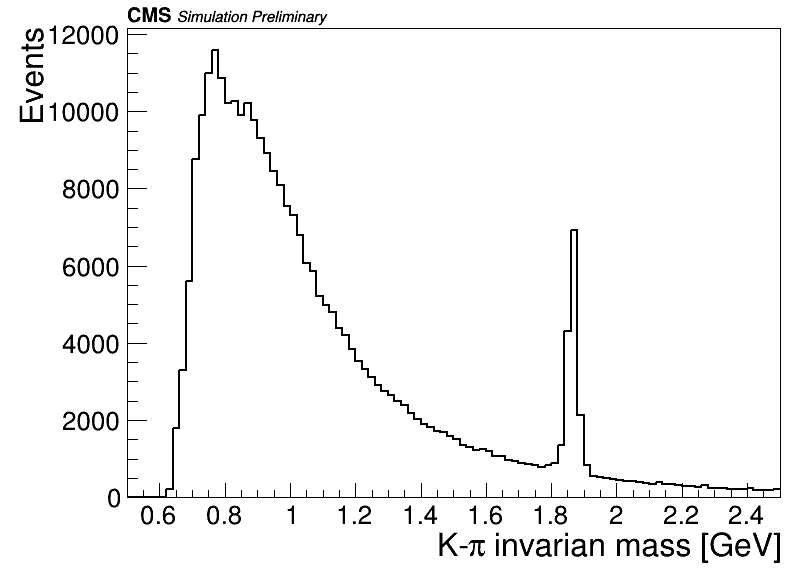

In [11]:
h = create_TH1D(dMC['mass_kpi'], axis_title=['K-#pi invarian mass [GeV]', 'Events'], binning=[100,0.5,2.5])
CMS_lumi.extraText = "     Simulation Preliminary"
c = drawOnCMSCanvas([h])
# c.SaveAs('../fig/1904_1/MC_kpi_M.png')

<ROOT.TLine object ("TLine") at 0x7fe090e1b120>

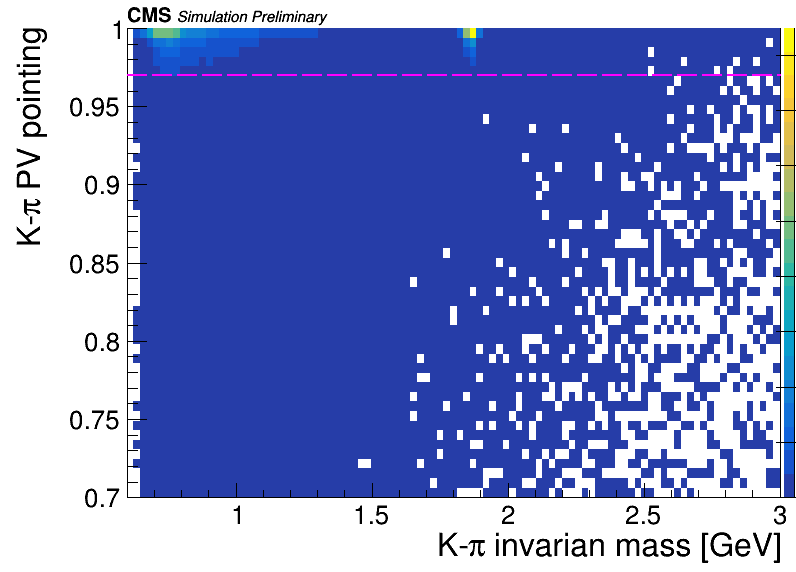

In [12]:
h = create_TH2D(np.column_stack((dMC['mass_kpi'], dMC['cos_kpi_vtxMu'])), 
                axis_title=['K-#pi invarian mass [GeV]', 'K-#pi PV pointing', ''],
                binning=[np.linspace(0.6,3, num=100), np.linspace(0.7, 1, num=50)]
               )
c = drawOnCMSCanvas([h], ['colz'])
cl.DrawLine(h.binning[0][0], cut['cos_kpi_vtxMu'], h.binning[0][-1], cut['cos_kpi_vtxMu'])
# c.SetLogy()
# c.SaveAs('../fig/1904_1/MC_kpi_MvsChi2.png')

<ROOT.TLine object ("TLine") at 0x7fe090968ad0>

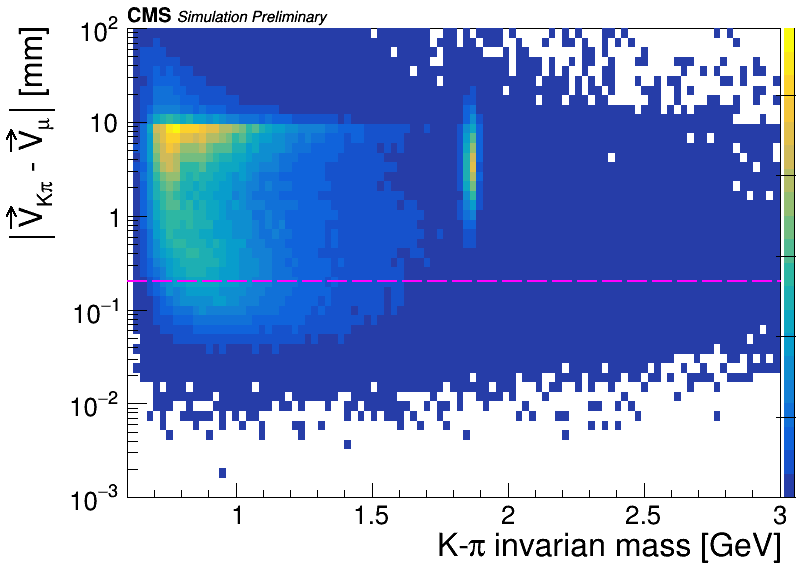

In [23]:
h = create_TH2D(np.column_stack((dMC['mass_kpi'], 10*dMC['d_vtxkpi_vtxMu'])), 
                axis_title=['K-#pi invarian mass [GeV]', '#left|#vec{V}_{K#pi} - #vec{V}_{#mu}#right| [mm]', ''],
                binning=[np.linspace(0.6,3, num=100), np.logspace(-3, 2, num=50)]
               )
c = drawOnCMSCanvas([h], ['colz'])
c.SetLogy()
cl.DrawLine(h.binning[0][0], 10*cut['d_vtxkpi_vtxMu'], h.binning[0][-1],10*cut['d_vtxkpi_vtxMu'])

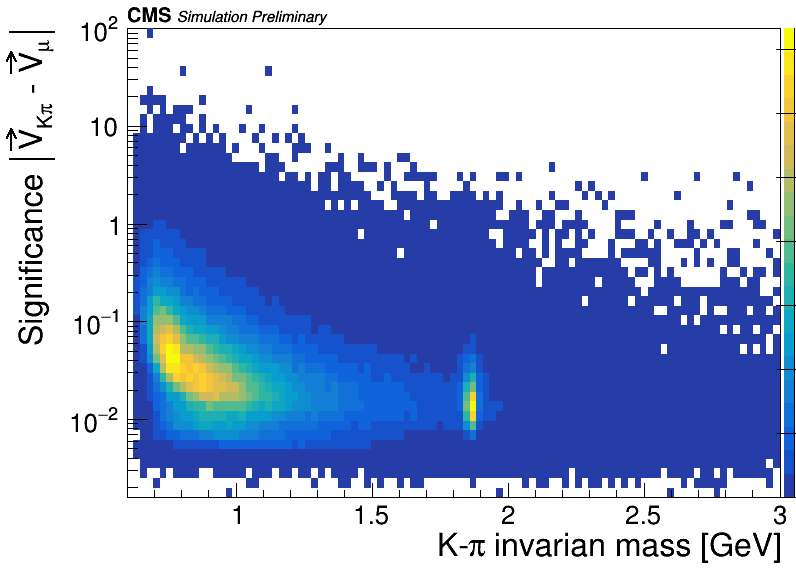

In [14]:
h = create_TH2D(np.column_stack((dMC['mass_kpi'], dMC['sigd_vtxkpi_vtxMu'])), 
                axis_title=['K-#pi invarian mass [GeV]', 'Significance #left|#vec{V}_{K#pi} - #vec{V}_{#mu}#right|', ''],
                binning=[np.linspace(0.6,3, num=100), np.logspace(-2.8, 2, num=50)]
               )
c = drawOnCMSCanvas([h], ['colz'])
c.SetLogy()

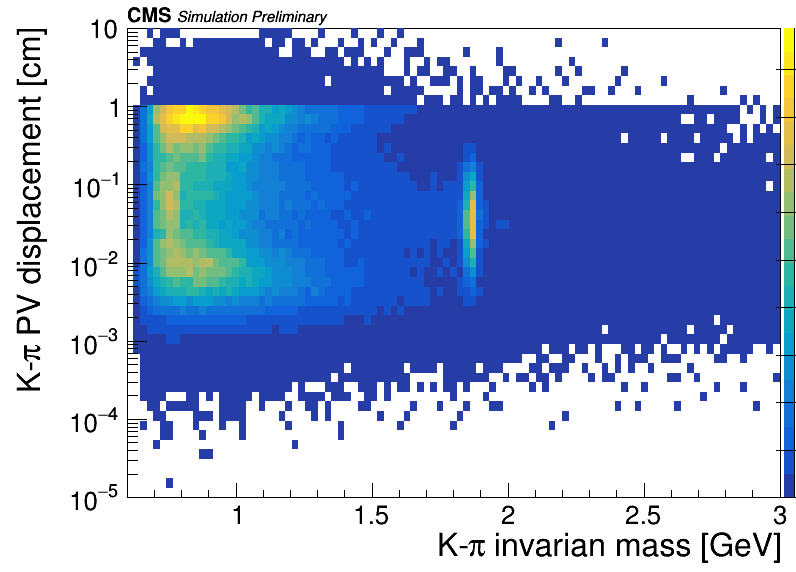

In [15]:
h = create_TH2D(np.column_stack((dMC['mass_kpi'], dMC['dca_kpi_vtxMu'])), 
                axis_title=['K-#pi invarian mass [GeV]', 'K-#pi PV displacement [cm]', ''],
                binning=[np.linspace(0.6,3, num=100), np.logspace(-5, 1, num=50)]
               )
c = drawOnCMSCanvas([h], ['colz'])
c.SetLogy()

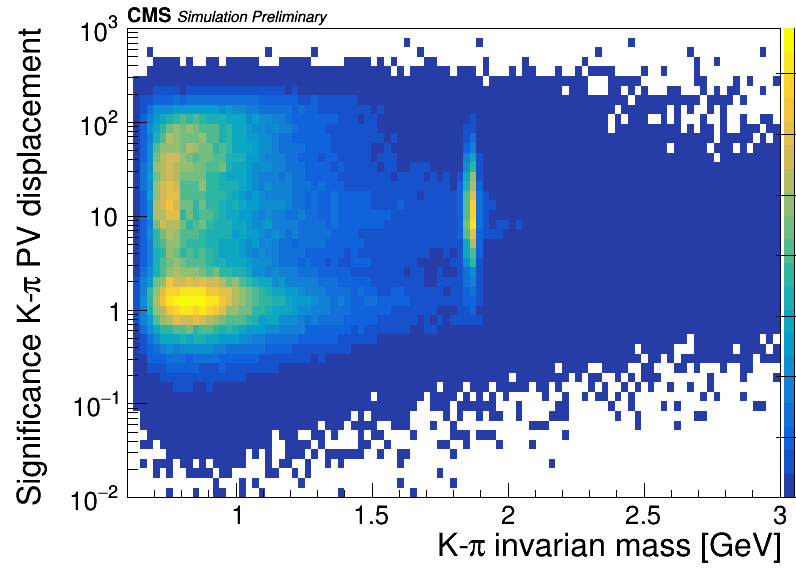

In [16]:
h = create_TH2D(np.column_stack((dMC['mass_kpi'], dMC['sigdca_kpi_vtxMu'])), 
                axis_title=['K-#pi invarian mass [GeV]', 'Significance K-#pi PV displacement', ''],
                binning=[np.linspace(0.6,3, num=100), np.logspace(-2, 3, num=50)]
               )
c = drawOnCMSCanvas([h], ['colz'])
c.SetLogy()

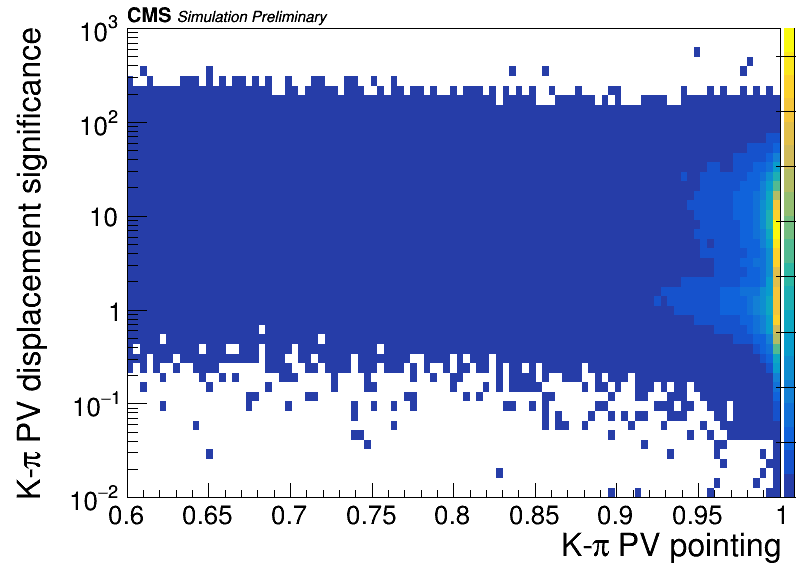

In [17]:
h = create_TH2D(np.column_stack((dMC['cos_kpi_vtxMu'], dMC['sigdca_kpi_vtxMu'])), 
                axis_title=['K-#pi PV pointing', 'K-#pi PV displacement significance', ''],
                binning=[np.linspace(0.6,1, num=100), np.logspace(-2, 3, num=50)]
               )
c = drawOnCMSCanvas([h], ['colz'])
c.SetLogy()

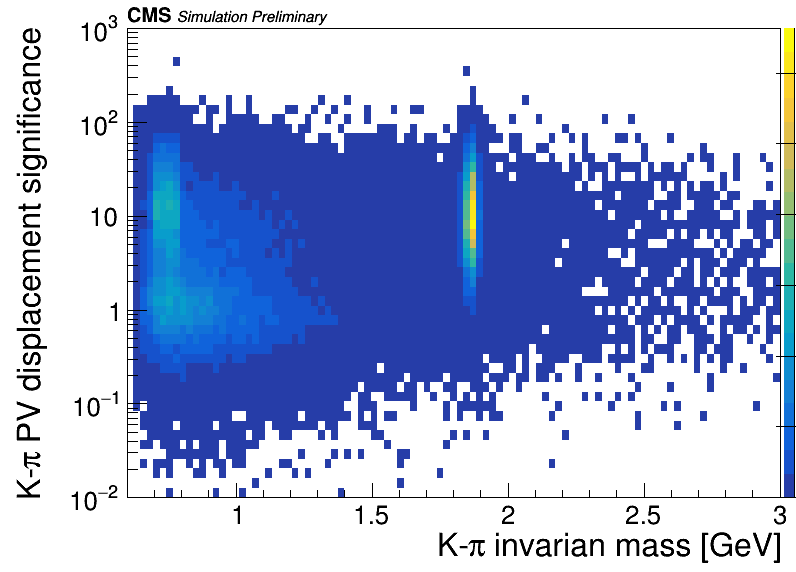

In [18]:
sel = dMC['cos_kpi_vtxMu'] > cut['cos_kpi_vtxMu']
h = create_TH2D(np.column_stack((dMC['mass_kpi'][sel], dMC['sigdca_kpi_vtxMu'][sel])), 
                axis_title=['K-#pi invarian mass [GeV]', 'K-#pi PV displacement significance', ''],
                binning=[np.linspace(0.6,3, num=100), np.logspace(-2, 3, num=50)]
               )
c = drawOnCMSCanvas([h], ['colz'])
c.SetLogy()

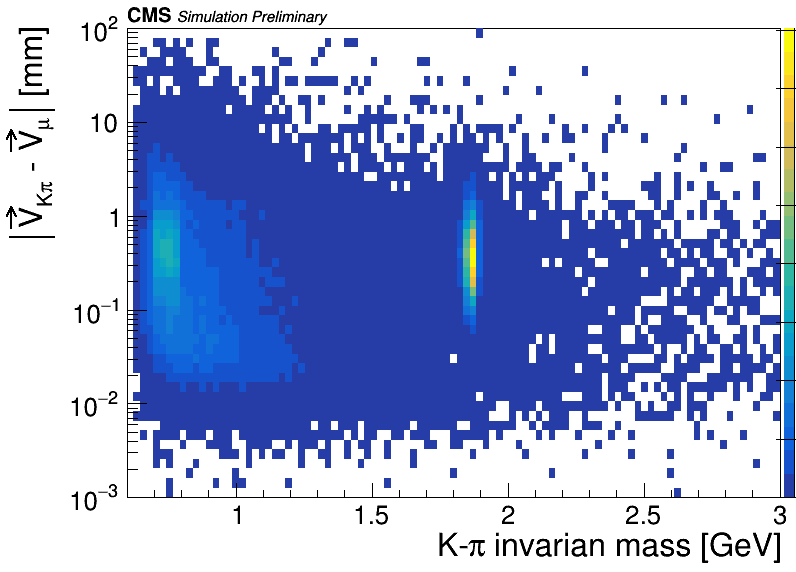

In [19]:
sel = dMC['cos_kpi_vtxMu'] > cut['cos_kpi_vtxMu']
h = create_TH2D(np.column_stack((dMC['mass_kpi'][sel], dMC['d_vtxkpi_vtxMu'][sel])), 
                axis_title=['K-#pi invarian mass [GeV]', '#left|#vec{V}_{K#pi} - #vec{V}_{#mu}#right| [mm]', ''],
                binning=[np.linspace(0.6,3, num=100), np.logspace(-3, 2, num=50)]
               )
c = drawOnCMSCanvas([h], ['colz'])
c.SetLogy()

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in greater


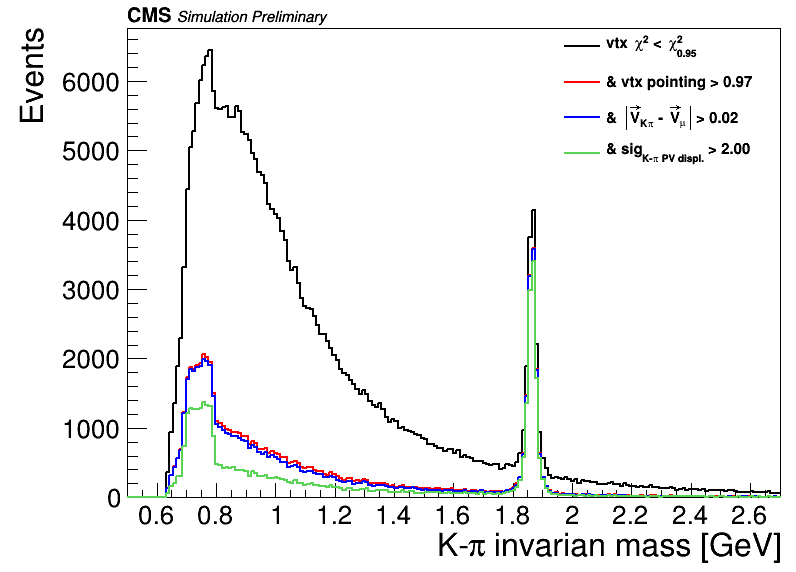

In [20]:
leg = rt.TLegend(0.7,0.7,0.95,0.95)
leg.SetLineWidth(0)
leg.SetBorderSize(0)
leg.SetFillStyle(0)

hl = []
lsel = []

h = create_TH1D(dMC['mass_kpi'], axis_title=['K-#pi invarian mass [GeV]', 'Events'], binning=[200,0.5,2.7])
leg.AddEntry(h, 'vtx #chi^{2} < #chi^{2}_{0.95}', 'l')
hl.append(h)
lsel.append(np.ones_like(dMC['mass_kpi'], dtype=bool))

sel = dMC['cos_kpi_vtxMu'] > cut['cos_kpi_vtxMu']
hcut = create_TH1D(dMC['mass_kpi'][sel], binning=h.binning)
leg.AddEntry(hcut, '& vtx pointing > {:.2f}'.format(cut['cos_kpi_vtxMu']), 'l')
hcut.SetLineColor(2)
hl.append(hcut)
lsel.append(sel)

sel = np.logical_and(sel, dMC['d_vtxkpi_vtxMu'] > cut['d_vtxkpi_vtxMu'])
hcut2 = create_TH1D(dMC['mass_kpi'][sel], binning=h.binning)
leg.AddEntry(hcut2, '& #left|#vec{V}_{K#pi} - #vec{V}_{#mu}#right| > '+'{:.2f}'.format(cut['d_vtxkpi_vtxMu']), 'l')
hcut2.SetLineColor(4)
hl.append(hcut2)
lsel.append(sel)

sel = np.logical_and(sel, dMC['sigdca_kpi_vtxMu'] > cut['sigdca_kpi_vtxMu'])
hcut2 = create_TH1D(dMC['mass_kpi'][sel], binning=h.binning)
leg.AddEntry(hcut2, '& sig_{K-#pi PV displ.} > '+'{:.2f}'.format(cut['sigdca_kpi_vtxMu']), 'l')
hcut2.SetLineColor(8)
hl.append(hcut2)
lsel.append(sel)

CMS_lumi.extraText = "     Simulation Preliminary"
c = drawOnCMSCanvas(hl, 'same')
leg.Draw()
# c.SaveAs('/Users/olmo/Desktop/MC_kpi_M_pointing.png')
# c.SetLogy()

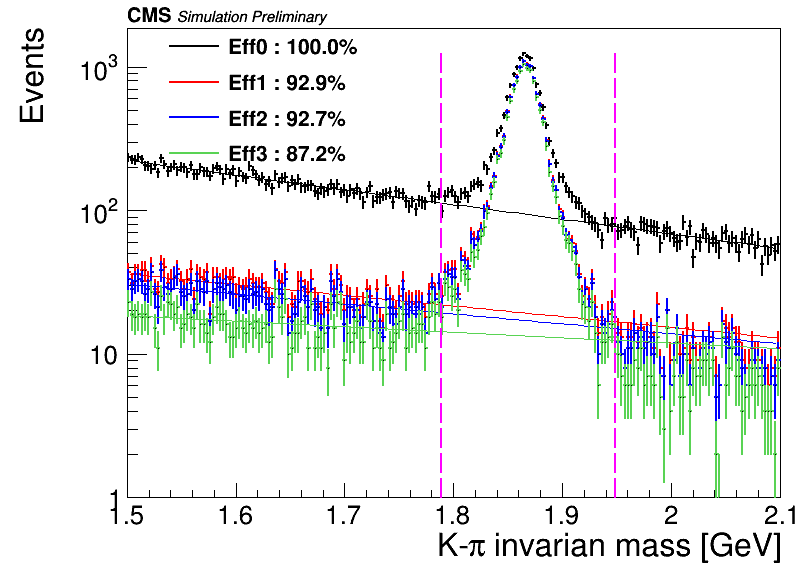

In [21]:
pk_width = 0.08

leg = rt.TLegend(0.2,0.7,0.55,0.95)
leg.SetLineWidth(0)
leg.SetBorderSize(0)
leg.SetFillStyle(0)

dobj = []
N_sig = []
for i, h in enumerate(hl):
    h = create_TH1D(dMC['mass_kpi'][lsel[i]], axis_title=['K-#pi invarian mass [GeV]', 'Events'], binning=[200,1.5,2.1])
    h.SetLineColor(hl[i].GetLineColor())
    h.Sumw2()
    dobj.append(h)
    
    if i == 0:
        fun = 'expo'
    else:
        fun = 'expo'
        
    f = rt.TF1('bkg', fun, h.binning[1], h.binning[2])
    f.SetLineColor(hl[i].GetLineColor())
    f.SetLineStyle(9)
    r = h.Fit(f, 'LSNQ', '', h.binning[1], m_D0-pk_width).Get()
    if r.Prob() < 0.05:
        print '[WARNING]: Bad fit fot histo N', i
    dobj.append(f)

    n_start = h.FindBin(m_D0-pk_width)
    n_stop = h.FindBin(m_D0+pk_width)

    Nsig = 0
    for n in range(n_start, n_stop+1):
        Nsig += h.GetBinContent(n) - f.Eval(h.GetBinCenter(n))
    N_sig.append(Nsig)
    leg.AddEntry(h, 'Eff'+str(i)+' : {:.1f}%'.format(Nsig/N_sig[0]*100), 'l')

hmax = np.max([h.GetMaximum() if i%2 == 0 else 0 for i,h in enumerate(dobj)])
hmin = np.min([h.GetMinimum() if i%2 == 0 else 1e10 for i,h in enumerate(dobj)])
dobj[0].GetYaxis().SetRangeUser(hmin, 1.5*hmax)
c = drawOnCMSCanvas(dobj, ['SAME']*len(dobj))
cl.DrawLine(m_D0-pk_width, hmin, m_D0-pk_width, hmax)
cl.DrawLine(m_D0+pk_width, hmin, m_D0+pk_width, hmax)
leg.Draw()
c.SetLogy()

## RD only

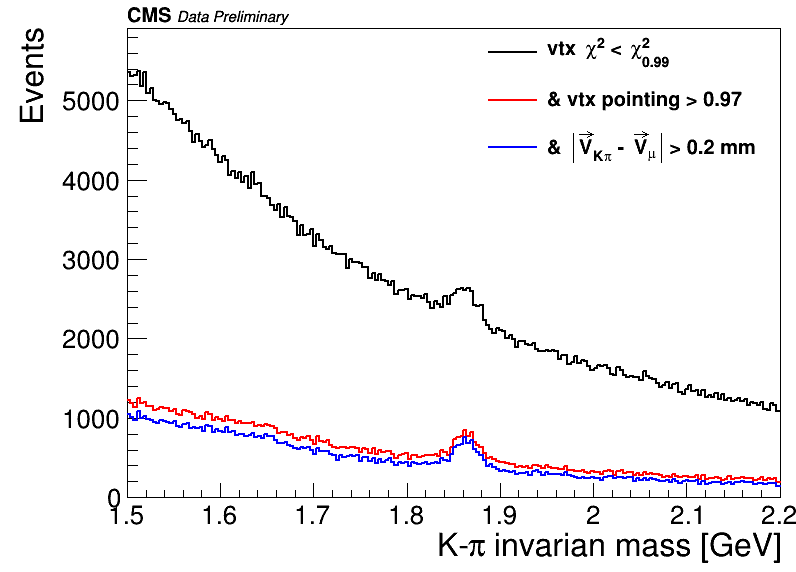

In [30]:
leg = rt.TLegend(0.6,0.7,0.95,0.95)
leg.SetLineWidth(0)
leg.SetBorderSize(0)
leg.SetFillStyle(0)

hl = []
lsel = []

h = create_TH1D(dRD['mass_kpi'], axis_title=['K-#pi invarian mass [GeV]', 'Events'], binning=[200,1.5,2.2])
leg.AddEntry(h, 'vtx #chi^{2} < #chi^{2}_{0.99}', 'l')
hl.append(h)
lsel.append(np.ones_like(dRD['mass_kpi'], dtype=bool))

sel = dRD['cos_kpi_vtxMu'] > cut['cos_kpi_vtxMu']
hcut = create_TH1D(dRD['mass_kpi'][sel], binning=h.binning)
leg.AddEntry(hcut, '& vtx pointing > {:.2f}'.format(cut['cos_kpi_vtxMu']), 'l')
hcut.SetLineColor(2)
hl.append(hcut)
lsel.append(sel)

sel = np.logical_and(sel, dRD['d_vtxkpi_vtxMu'] > cut['d_vtxkpi_vtxMu'])
hcut2 = create_TH1D(dRD['mass_kpi'][sel], binning=h.binning)
leg.AddEntry(hcut2, '& #left|#vec{V}_{K#pi} - #vec{V}_{#mu}#right| > '+'{:.1f} mm'.format(10*cut['d_vtxkpi_vtxMu']), 'l')
hcut2.SetLineColor(4)
hl.append(hcut2)
lsel.append(sel)

# sel = np.logical_and(sel, dRD['sigdca_kpi_vtxMu'] > cut['sigdca_kpi_vtxMu'])
# hcut2 = create_TH1D(dRD['mass_kpi'][sel], binning=h.binning)
# leg.AddEntry(hcut2, '& sig_{K-#pi PV displ.} > '+'{:.2f}'.format(cut['sigdca_kpi_vtxMu']), 'l')
# hcut2.SetLineColor(8)
# hl.append(hcut2)
# lsel.append(sel)

CMS_lumi.extraText = "     Data Preliminary"
c = drawOnCMSCanvas(hl, 'same')
hl[0].GetYaxis().SetRangeUser(0, hl[0].GetMaximum()*1.1)
leg.Draw()

Tot histo entries: 249007
Total: Nsig = 3391, Nbkg = 245614
Sig region histo entries: 54874
Sig region: Nsig = 3381, Nbkg = 48294

Tot histo entries: 53634
Total: Nsig = 3279, Nbkg = 50355
Sig region histo entries: 14469
Sig region: Nsig = 3270, Nbkg = 10606

Tot histo entries: 43477
Total: Nsig = 3250, Nbkg = 40227
Sig region histo entries: 11774
Sig region: Nsig = 3241, Nbkg = 8356



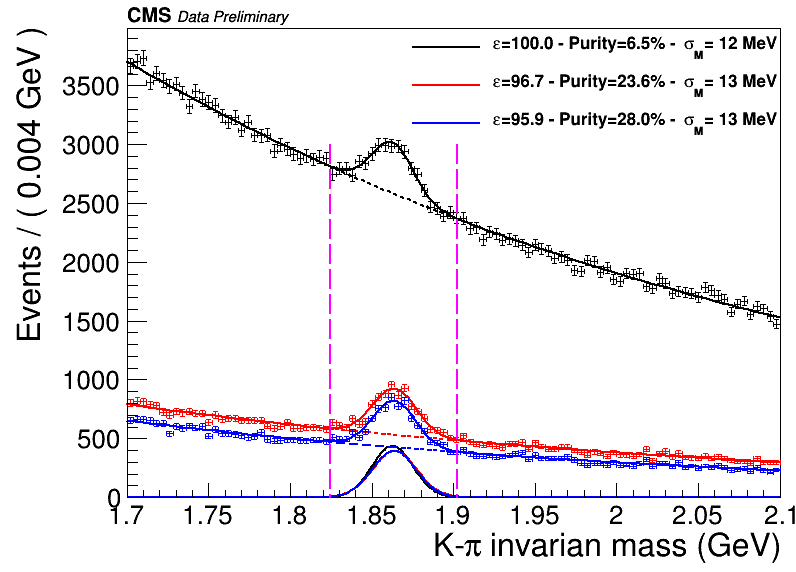

In [25]:
pk_width = 0.04
fit_stop = 0.06

leg = rt.TLegend(0.5,0.75,0.98,0.95)
leg.SetLineWidth(0)
leg.SetBorderSize(0)
leg.SetFillStyle(0)

useRooFit = True

dobj = []
N_sig = []
purity = []

sig_mean = []
sig_sigma = []

binning = [100,1.7,2.1]
m = rt.RooRealVar('m', 'K-#pi invarian mass', binning[1], binning[2], 'GeV')
frame = m.frame(rf.Title(""))

for i, h in enumerate(hl):
    h = create_TH1D(dRD['mass_kpi'][lsel[i]], axis_title=['K-#pi invarian mass [GeV]', 'Events'], binning=binning)
    h.SetLineColor(hl[i].GetLineColor())
    h.Sumw2()
    dobj.append(h)
    
    print 'Tot histo entries: {:.0f}'.format(h.Integral(1, h.binning[0]))
    
    if(useRooFit):
        mean = rt.RooRealVar('mean', 'm_{D0}', m_D0, 0, 5, 'GeV')
        sigma = rt.RooRealVar('sigma', '#sigma', 0.01, 0.001, 0.05, 'GeV') 
        pdf_sig = rt.RooGaussian('gaus','sig pdf', m, mean, sigma)
        
        nsig = rt.RooRealVar('nsig', 'N_{S}', 3000, 0, 1e6)
        pdf_sig_ext = rt.RooExtendPdf('esig', 'esig', pdf_sig, nsig)
        
        lam = rt.RooRealVar('lam', '#lambda', -2.1, -100, -0.1, 'GeV^{-1}')
        pdf_bkg = rt.RooExponential('expo', 'bkg pdf', m, lam)
        
        nbkg = rt.RooRealVar('nbkg', 'N_{B}', 0, 1e6)
        pdf_bkg_ext = rt.RooExtendPdf('ebkg', 'ebkg', pdf_bkg, nbkg)
        
        data = rt.RooDataHist('d', 'd', rt.RooArgList(m), h)

        pdf_tot = rt.RooAddPdf('pdftot', 'pdftot', rt.RooArgList(pdf_sig_ext, pdf_bkg_ext))
        pdf_tot.fitTo(data, rt.RooFit.PrintLevel(-1))
        
        chi2 = rt.RooChi2Var("chi2", 'chi2', pdf_tot, data)
        if chi2.getVal() > rt.TMath.ChisquareQuantile(0.95, h.binning[0]-1-5):
            print '[WARNING] Chi2:', chi2.getVal(), '/', h.binning[0]-1-5
            
        print 'Total: Nsig = {:.0f}, Nbkg = {:.0f}'.format(nsig.getVal(), nbkg.getVal())

        data.plotOn(frame, rf.MarkerStyle(1), rf.DrawOption('E1'), rf.MarkerColor(hl[i].GetLineColor()), rf.LineColor(hl[i].GetLineColor()))
#         pdf_tot.paramOn(frame, rf.Layout(0.6, 0.9, 0.9), rf.Format('NEU') );
        pdf_tot.plotOn(frame, rf.LineColor(hl[i].GetLineColor()), rf.LineWidth(2))
        pdf_tot.plotOn(frame, rf.Components('esig'), rf.LineColor(hl[i].GetLineColor()), rf.LineWidth(2))
        pdf_tot.plotOn(frame, rf.Components('ebkg'), rf.LineColor(hl[i].GetLineColor()), rf.LineWidth(2), rf.LineStyle(7))
        
        lb = mean.getVal()-3*sigma.getVal()
        hb = mean.getVal()+3*sigma.getVal()
        print 'Sig region histo entries: {:.0f}'.format(h.Integral(h.FindBin(lb), h.FindBin(hb)))
#         m.setRange("signal", lb, hb)
#         fsigregion_bkg = pdf_bkg.createIntegral(rt.RooArgSet(m), rf.NormSet(rt.RooArgSet(m)), rf.Range("signal"))
#         fsigregion_sig = pdf_sig.createIntegral(rt.RooArgSet(m), rf.NormSet(rt.RooArgSet(m)), rf.Range("signal"))

#         Nsig = fsigregion_sig.getVal()*nsig.getVal()
#         Nbkg = fsigregion_bkg.getVal()*nbkg.getVal()
        
        l = lam.getVal()
        expInt = (np.exp(l*lb) - np.exp(l*hb))/(np.exp(l*binning[1]) - np.exp(l*binning[2]))
        Nbkg = expInt * nbkg.getVal()
        Nsig = erf(3/np.sqrt(2)) * nsig.getVal()
        print 'Sig region: Nsig = {:.0f}, Nbkg = {:.0f}\n'.format(Nsig, Nbkg)
        
        N_sig.append(Nsig)
        purity.append(Nsig/float(Nbkg+Nsig))
        
        sig_mean.append(mean.getVal())
        sig_sigma.append(sigma.getVal())
        
        leg.AddEntry(h, '#varepsilon={:.1f} - Purity={:.1f}% - #sigma_{{M}}= {:.0f} MeV'.format(100*Nsig/N_sig[0], purity[-1]*100, 1e3*sigma.getVal()), 'l')
    else:
        if i == 0:
            fun = 'expo'
        else:
            fun = 'expo'

        f = rt.TF1('bkg', fun, h.binning[1], h.binning[2])
        f.SetLineColor(hl[i].GetLineColor())
        f.SetLineStyle(9)
        r = h.Fit(f, 'LSNQ', '', h.binning[1], m_D0-fit_stop).Get()
        if r.Prob() < 0.05:
            print '[WARNING]: Bad fit fot histo N', i
        dobj.append(f)

        n_start = h.FindBin(m_D0-pk_width)
        n_stop = h.FindBin(m_D0+pk_width)

        Nsig = 0
        Ntot = 0
        for n in range(n_start, n_stop+1):
            Nsig += h.GetBinContent(n) - f.Eval(h.GetBinCenter(n))
            Ntot += h.GetBinContent(n)
        N_sig.append(Nsig)
        purity.append(Nsig/Ntot)
        leg.AddEntry(h, '#varepsilon={:.1f}% - Purity={:.1f}%'.format(100*Nsig/N_sig[0], purity[-1]*100), 'l')


if useRooFit:
    CMS_lumi.extraText = "     Data Preliminary"
    c = drawOnCMSCanvas(frame)
    mD0_avg = np.mean(sig_mean)
    resD0_avg = np.mean(sig_sigma)
    cl.DrawLine(mD0_avg-3*resD0_avg, 0, mD0_avg-3*resD0_avg, 3000)
    cl.DrawLine(mD0_avg+3*resD0_avg, 0, mD0_avg+3*resD0_avg, 3000)
else:
    hmax = np.max([h.GetMaximum() if i%2 == 0 else 0 for i,h in enumerate(dobj)])
    hmin = np.min([h.GetMinimum() if i%2 == 0 else 1e10 for i,h in enumerate(dobj)])
    dobj[0].GetYaxis().SetRangeUser(hmin, 1.*hmax)
    c = drawOnCMSCanvas(dobj, ['SAME']*len(dobj))
    cl.DrawLine(m_D0-pk_width, hmin, m_D0-pk_width, hmax)
    cl.DrawLine(m_D0+pk_width, hmin, m_D0+pk_width, hmax)
    cl.SetLineColor(5)
    cl.DrawLine(m_D0-fit_stop, hmin, m_D0-fit_stop, hmax)
    cl.DrawLine(m_D0+fit_stop, hmin, m_D0+fit_stop, hmax)
    cl.SetLineColor(6)
leg.Draw()
# c.SetLogy()